# KNMI Drought Indices

J.P.M. Witte, G.A.P.H. van den Eertwegh and P.J.J.F. Torfs (2025) - [Absolute Meteorological Drought Indices Validated Against Irrigation Amounts](https://doi.org/10.3390/w17071056).

## Load packages

In [1]:
import matplotlib as mpl
import pandas as pd

from spei import knmi
from spei.plot import deficit_knmi
from spei.utils import group_yearly_df

## Get data
Data from De Bilt (260) or P13 stations from 1960 till today

### Most recent De Bilt data

In [2]:
# import hydropandas as hpd
# prec = hpd.PrecipitationObs.from_knmi(
#     meteo_var="RH",
#     stn=260,
#     startdate=pd.Timestamp("1960-01-01"),
#     enddate=pd.Timestamp.today(),
# )["RH"].multiply(1e3)
# prec.index = prec.index.normalize()
# evap = hpd.EvaporationObs.from_knmi(
#     meteo_var="EV24",
#     stn=260,
#     startdate=pd.Timestamp("1960-01-01"),
#     enddate=pd.Timestamp.today(),
# )["EV24"].multiply(1e3)
# evap.index = evap.index.normalize()
# temp = hpd.MeteoObs.from_knmi(
#     meteo_var="TG",
#     stn=260,
#     startdate=pd.Timestamp("1960-01-01"),
#     enddate=pd.Timestamp.today(),
# )["TG"]
# temp.index = temp.index.normalize()

### KNMI stations data
https://www.knmi.nl/kennis-en-datacentrum/achtergrond/achtergrondinformatie-klimaatdashboard

De neerslagtekort klimaatdashboardgrafiek is alleen voor het landelijk gemiddelde beschikbaar, gebaseerd op:

Voor 1906 t/m 2000: officiële reeks voor Nederland voor neerslagtekort:  Dagelijks neerslagtekort NL (1 apr t/m 30 sep) op basis van Makkink verdamping De Bilt geschat uit zonneschijnduur minus 13 neerslagstations (P13) (c) KNMI, mei 2020, Jules Beersma: Climate Explorer 

Vanaf 2001: verdamping (gemiddelde van 13 automatische weerstations nabij 13 neerslagstations) minus de gemiddelde neerslag van 13 neerslagstations:
De P13: het gemiddelde van de hoeveelheid neerslag op de volgende 13 KNMI-neerslagstations: De Bilt (550_N), De Kooy (25_N), Groningen (139_N), Heerde (328_N), Hoofddorp (438_N), Hoorn (222_N), Kerkwerve (737_N), Oudenbosch (828_N), Roermond (961_N), Ter Apel (144_N), West-Terschelling (11_N), Westdorpe (770_N) en Winterswijk (666_N).

Het gemiddelde van de hoeveelheid verdamping (EV24) op 13 automatische weerstations van het KNMI nabij de 13 neerslagstations: De Bilt (260_H), De Kooy (235_H), Eelde (280_H), Heino (278_H), Schiphol (240_H), Berkhout (249_H), Vlissingen (310_H), Eindhoven (370_H), Ell (377_H), Nieuw Beerta (286_H), Hoorn Terschelling (251_H), Westdorpe (319_H) en Hupsel (283_H).


In [3]:
# import hydropandas as hpd

# P13 stations
# p_stns = [
#     550,  # De Bilt
#     25,   # De Kooy
#     139,  # Groningen
#     328,  # Heerde
#     438,  # Hoofddorp
#     222,  # Hoorn
#     737,  # Kerkwerve
#     828,  # Oudenbosch
#     961,  # Roermond
#     144,  # Ter Apel
#     11,   # West-Terschelling
#     770,  # Westdorpe
#     666,  # Winterswijk
# ]

# # EV24-13 stations
# ev_stns = [
#     260,  # De Bilt
#     235,  # De Kooy
#     280,  # Eelde
#     278,  # Heino
#     240,  # Schiphol
#     249,  # Berkhout
#     310,  # Vlissingen
#     370,  # Eindhoven
#     377,  # Ell
#     286,  # Nieuw Beerta
#     251,  # Hoorn Terschelling
#     319,  # Westdorpe
#     283,  # Hupsel
# ]
# oc_p = hpd.ObsCollection.from_knmi(
#     stns=p_stns,
#     starts=pd.Timestamp("1960-01-01"),
#     ends=pd.Timestamp.today(),
#     meteo_vars=["RD"],
# )
# oc_ev = hpd.ObsCollection.from_knmi(
#     stns=ev_stns,
#     starts=pd.Timestamp("1960-01-01"),
#     ends=pd.Timestamp.today(),
#     meteo_vars=["EV24", "TG"],
# )

# prec = pd.concat([o["RD"] for o in oc_p["obs"]], axis=1).mean(axis=1).multiply(1e3).rename("prec")
# prec.index = prec.index.normalize()
# ev_data = pd.DataFrame({mv: pd.concat([o[mv] for o in gr["obs"]], axis=1).mean(axis=1) for mv, gr in oc_ev.groupby("meteo_var")})
# ev_data.index = ev_data.index.normalize()
# ev_data = ev_data.loc[prec.index]  # align indices because prec stations less frequently reported
# evap = ev_data["EV24"].multiply(1e3).rename("evap")
# temp = ev_data["TG"].rename("temp")

### From a CSV file

In [4]:
df = pd.read_csv("data/DEBILT.csv", index_col=0, parse_dates=True)
prec = df["Prec [m/d] 260_DEBILT"].multiply(1e3).rename("prec")
evap = df["Evap [m/d] 260_DEBILT"].multiply(1e3).rename("evap")
temp = df["Temp [C] 260_DEBILT"].rename("temp")

## Calculate precipitation deficit

/home/runner/work/SPEI/SPEI/.tox/docu/lib/python3.11/site-packages/spei/knmi.py:54: RuntimeWarning: invalid value encountered in accumulate
  return pd.Series(sumlm.accumulate(deficit.values), deficit.index, dtype=float)
/home/runner/work/SPEI/SPEI/.tox/docu/lib/python3.11/site-packages/spei/knmi.py:54: RuntimeWarning: invalid value encountered in accumulate
  return pd.Series(sumlm.accumulate(deficit.values), deficit.index, dtype=float)


(0.0, 354.26999999999987)

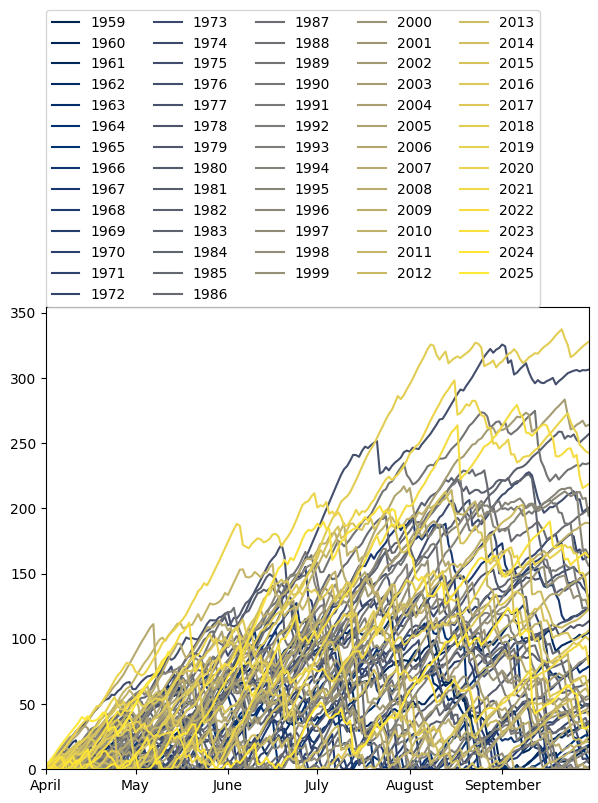

In [5]:
deficit = evap - prec
## deficit period
startdate = pd.Timestamp("2000-04-01")
enddate = pd.Timestamp("2000-09-30")
# calculate cumulative deficit
cumdf = knmi.get_cumulative_deficit(
    deficit=deficit,
    startdate=startdate,
    enddate=enddate,
    allow_below_zero=False,
)
# plot deficit
ax = cumdf.plot(figsize=(7.0, 6.0), cmap="cividis")
ax.legend(ncol=5, loc=(0, 1))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("%B"))
ax.xaxis.set_ticks([], minor=True)
ax.set_ylim(0.0)

## Precipitation deficit indices

In [6]:
doct1 = knmi.deficit_oct1(deficit)
doct1.to_frame().transpose()

/home/runner/work/SPEI/SPEI/.tox/docu/lib/python3.11/site-packages/spei/knmi.py:54: RuntimeWarning: invalid value encountered in accumulate
  return pd.Series(sumlm.accumulate(deficit.values), deficit.index, dtype=float)
/home/runner/work/SPEI/SPEI/.tox/docu/lib/python3.11/site-packages/spei/knmi.py:54: RuntimeWarning: invalid value encountered in accumulate
  return pd.Series(sumlm.accumulate(deficit.values), deficit.index, dtype=float)


1959  1960  1961   1962  1963  1964  1965  1966   1967  1968  ...  \
Doct1   NaN  17.2  21.2  104.7   7.6  78.7  24.9  18.6  124.1   0.0  ...   

       2016  2017   2018   2019   2020  2021   2022   2023  2024  2025  
Doct1  99.5  56.6  327.8  124.3  242.6  80.6  218.8  162.8  32.8   NaN  

[1 rows x 67 columns]

In [7]:
dmax = knmi.deficit_max(deficit)
dmax.to_frame().transpose()

/home/runner/work/SPEI/SPEI/.tox/docu/lib/python3.11/site-packages/spei/knmi.py:54: RuntimeWarning: invalid value encountered in accumulate
  return pd.Series(sumlm.accumulate(deficit.values), deficit.index, dtype=float)
/home/runner/work/SPEI/SPEI/.tox/docu/lib/python3.11/site-packages/spei/knmi.py:54: RuntimeWarning: invalid value encountered in accumulate
  return pd.Series(sumlm.accumulate(deficit.values), deficit.index, dtype=float)


1959   1960  1961   1962  1963   1964  1965   1966   1967  1968  ...  \
Dmax   NaN  104.8  75.8  116.9  92.1  113.4  49.1  105.9  194.6  43.3  ...   

       2016   2017   2018   2019   2020   2021   2022   2023   2024  2025  
Dmax  101.7  143.4  337.4  172.1  298.2  119.8  279.3  201.8  123.8  89.9  

[1 rows x 67 columns]

In [8]:
diapr1 = knmi.deficit_apr1(deficit)
diapr1.to_frame().transpose()

1959   1960  1961   1962   1963   1964   1965   1966   1967   1968  \
DIapr1  184.4  110.7  75.8  116.9  169.4  113.4  269.6  226.5  194.6  172.6   

        ...   2016   2017   2018   2019   2020   2021   2022   2023   2024  \
DIapr1  ...  119.6  142.8  337.4  172.1  295.7  119.8  279.3  201.8  123.8   

        2025  
DIapr1  87.3  

[1 rows x 67 columns]

In [9]:
digdd = knmi.deficit_gdd(deficit, temp, threshold=440.0)
digdd.to_frame().transpose()

1959   1960  1961   1962   1963   1964   1965   1966   1967   1968  \
DIgdd  120.9  110.7  75.8  109.9  169.4  113.4  219.3  226.5  194.6  172.6   

       ...   2016   2017   2018   2019   2020   2021   2022   2023   2024  \
DIgdd  ...  119.6  143.4  337.4  177.5  325.8  119.8  279.3  201.8  126.4   

       2025  
DIgdd  87.3  

[1 rows x 67 columns]

In [10]:
diwet = knmi.deficit_wet(deficit)
diwet.to_frame().transpose()

1959   1960   1961   1962   1963   1964   1965   1966   1967   1968  \
DIwet  184.4  112.6  157.8  176.0  169.4  113.4  382.3  350.0  194.6  232.1   

       ...   2016   2017   2018   2019   2020   2021   2022   2023   2024  \
DIwet  ...  253.6  164.1  337.4  189.7  325.8  129.5  279.3  239.3  310.2   

        2025  
DIwet  141.9  

[1 rows x 67 columns]

## Compare to original KNMI data

File obtained from https://climexp.knmi.nl/getindices.cgi?NPERYEAR=366&STATION=precipitationdeficit&TYPE=i&WMO=KNMIData/nt_nl&id=someone@somewhere

(0.0, 380.52)

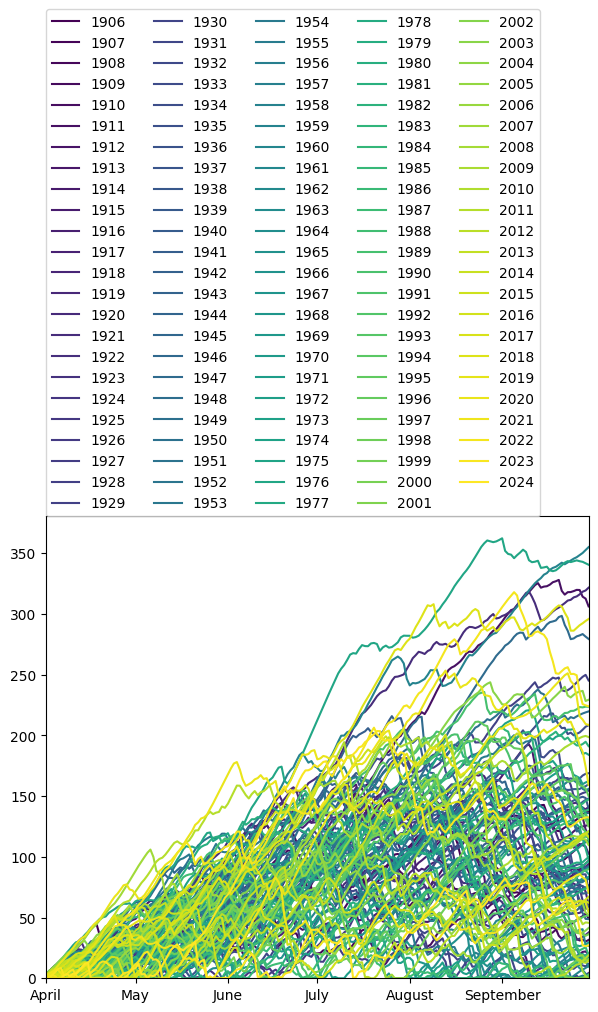

In [11]:
knmi_cumdf = group_yearly_df(
    pd.read_csv(
        "data/neerslagtekort.txt",
        skiprows=11,
        sep="\t",
        header=None,
        index_col=0,
        parse_dates=True,
        date_format="%Y%m%d",
    )
    .dropna(how="all", axis=1)
    .squeeze()
    .rename("KNMI")
)
knmi_cumdf.index.name = ""
ax = knmi_cumdf.plot(figsize=(7.0, 6.0), cmap="viridis")
ax.legend(ncol=5, loc=(0, 1))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("%B"))
ax.xaxis.set_ticks([], minor=True)
ax.set_ylim(0.0)

### KNMI plot

From KNMI website the drought deficit is plotted as below:

![neerslagtekort](https://cdn.knmi.nl/knmi/map/page/klimatologie/grafieken/neerslagtekort/neerslagtekort.png)

#### With KNMI deficit data
This plot can be reproduced (almost perfectly) as seen from the figure below.

The calculation uses the average precipitation from 13 reference stations in the Netherlands (the so-called P13/EV24-13 stations) and the reference evaporation calculated based on sunshine duration in De Bilt (until 2001) or the global radiation near the P13 stations (from 2001 onwards). For the median and 5% driest years a rolling window is aplied. However, the size of this window is not documented anywhere.

Text(0.5, 1.0, 'KNMI computed preciptiation deficit')

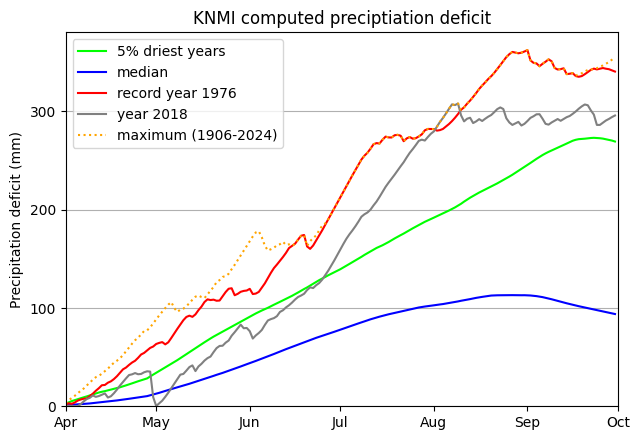

In [12]:
ax = deficit_knmi(knmi_cumdf, window=28)
ax.set_title("KNMI computed preciptiation deficit")

#### With own computed deficit (with downloaded knmi data)

Text(0.5, 1.0, 'Downloaded measurements')

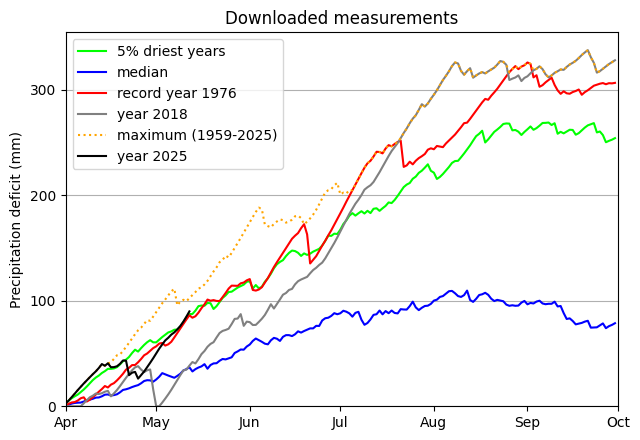

In [13]:
ax = deficit_knmi(cumdf, window=0)
ax.set_title("Downloaded measurements")